<a href="https://colab.research.google.com/github/juliosaopedro/Meus_Projetos/blob/master/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="http://sigmoidal.ai/wp-content/uploads/2019/08/logo_color.png" height="40px"></center>

# Análise dos Dados do Airbnb - Buenos Aires

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center>
<p align=center>
<img alt="Analisando Airbnb" width="20%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg" height="80px"/>
</p>

**Neste *notebook*, iremos analisar os dados referentes à cidade Buenos Aires, e ver quais insights podem ser extraídos a partir de dados brutos.**



<p align=center>
  <img src="https://github.com/juliosaopedro/Meus_Projetos/blob/master/imagens/buenos-aires-cidade.jpg?raw=true" height="400px"/>
</p>

<p align=center>
  <img src="https://github.com/juliosaopedro/Meus_Projetos/blob/master/imagens/Analise_Credito.jpg?raw=true" height="300px">
</p>
  


## Obtenção dos Dados
Dados obtidos a partir do portal [Airbnb](http://insideairbnb.com/get-the-data.html)

Para a resolução deste exercício vou usar os dados da cidade de [Buenos Aires](http://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2019-07-16/visualisations/listings.csv)

* `listings.csv` - *Summary information and metrics for listings in Buenos Aires (good for visualisations).*

In [ ]:
# importar os pacotes necessarios

# Pandas é uma biblioteca Python que fornece ferramentas de análise de dados e estruturas de dados de alta performance e fáceis de usar.
import pandas as pd


# matplotlib é uma biblioteca com recursos para a geração de gráficos 2D a partir de arrays.
import matplotlib.pyplot as plt

# Seaborn é uma biblioteca de visualização de dados Python baseada em matplotlib
import seaborn as sbs 

#A linha %matplotlib inline diz ao Jupyter que queremos mostrar os gráficos da Matplotlib no próprio notebook.

%matplotlib inline


In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2019-07-16/visualisations/listings.csv")


# **Análise dos Dados**



##Dicionário das variáveis

* id - número gerado para identificar o imóvel
* name - nome da propriedade anunciada 
* host_id - número de identificação do proprietário (anfitrião)
* host_name - nome do proprietário (anfitrião)
* neighbourhood_group - grupo de bairros (coluna com valores nulos)
* neighbourhood - Nome do bairro
* latitude - coordenada da latitude da propriedade
* longitude - coordenada de longitude da propriedade
* room_type - tipo do quarto
* price - preço
* minimum_nights - quantidade mínima de noites para reserva
* number_of_reviews - número de comentários
* last_review - último comentário
* reviews_per_month - comentários por mes
* calculated_host_listings_count - quantidade de imóves do proprietário (anfitrião)
* availability_365 - número de dias de disponibilidade nos últimos 365 dias 


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

###Nosso conjunto de dados 

In [ ]:
# mostrar as 5 primeiras entradas.
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,7270,¡¡Great Loft in Palermo Hollywood!!,18822,Toni,NaN,Palermo,-34.58241,-58.43382,Entire home/apt,1801,20,14,2018-04-30,0.16,1,325
1,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58225,-58.42460,Entire home/apt,2471,2,24,2019-07-03,0.28,1,360
2,12463,Room in Recoleta - awesome location,48799,Matt,NaN,Recoleta,-34.59761,-58.39468,Private room,1005,1,20,2017-12-11,0.18,1,365
3,13095,Standard Room at Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59382,-58.42994,Private room,2303,1,1,2018-12-18,0.14,7,365
4,13096,Standard Room in Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59398,-58.42853,Private room,2303,1,0,NaN,NaN,7,365


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 20715 entradas e 16 variáveis (`listings.csv.gz`).

In [ ]:
# identificar o volume de dados do DataFrame
print("Variáveis: {}".format(df.shape[0]))

print("Entradas : {}".format(df.shape[1]))

# saltar uma linha
print("\n")

# verificar os tipos das entradas do dataset

display(df.dtypes)

Variáveis: 20715
Entradas : 16




id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes

(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.287907
last_review                       0.287907
name                              0.000531
host_name                         0.000434
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

In [ ]:
# As colunas neighbourhood_group, reviews_per_month, last_review, name e host_name têm valores nulos

### **Q3. Qual o tipo de distribuição das variáveis?** 

Vamos plotar os gráficos para ver a distribuição das variáveis

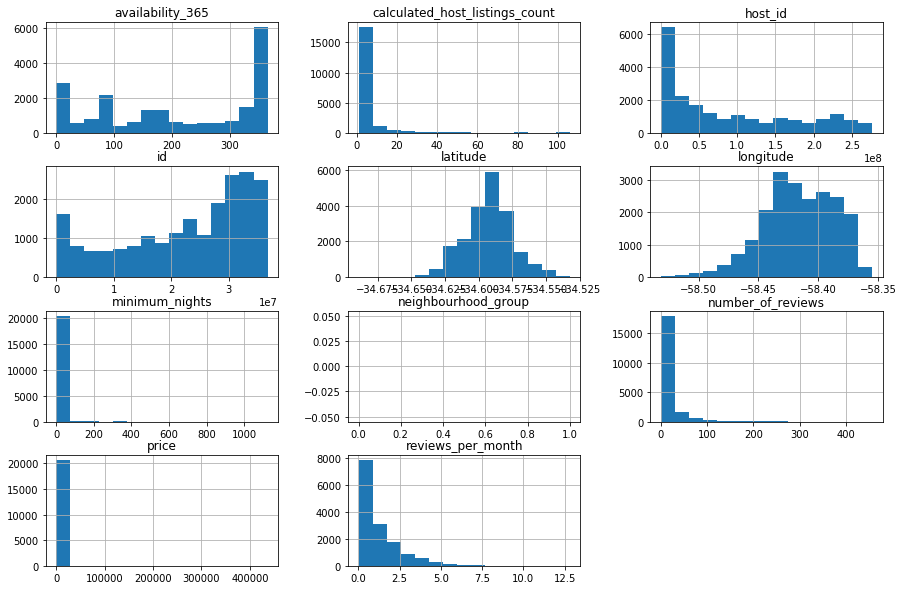

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));


### Q3.1 Verificando os outliers

Pela distribuição do histograma, é possível verificar indícios da presença de outliers. Olhe por exemplo as variáveis price, minimum_nights e calculated_host_listings_count, number_of_reviews.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de outliers. São elas:

* Resumo estatístico por meio do método describe()
* Plotar boxplots para a variável.


In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,20715.000000,20715.000000,20715.000000,14751.000000,20715.000000,20715.000000
mean,2391.179580,5.870963,14.391166,1.234762,6.254646,206.672122
std,8890.136396,20.954371,29.671122,1.357747,14.493871,133.864378
min,126.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,963.000000,1.000000,0.000000,0.280000,1.000000,85.000000
50%,1508.000000,3.000000,3.000000,0.770000,1.000000,196.000000
75%,2387.000000,4.000000,15.000000,1.770000,4.000000,349.000000
max,436553.000000,1125.000000,456.000000,12.820000,106.000000,365.000000


### **Q4. Qual a média dos preços de aluguel?**

Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 2387, porém seu valor máximo é 436553.
* A quantidade mínima de noites (`minimum_nights`) está acima do limite real de 365 dias no ano, 1125.

#### Boxplot para minimum_nights

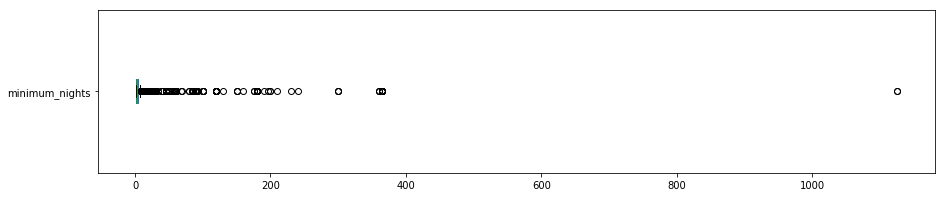

minimum_nights: valores acima de 30:
329 entradas
1.5882%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

### Boxplot para price

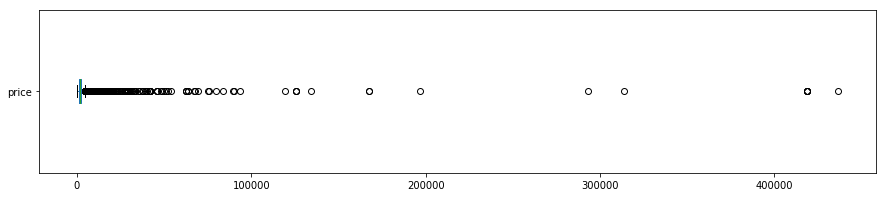

minimum_nights: valores acima de 8890:
439 entradas
2.1192%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 8890 para price
print("minimum_nights: valores acima de 8890:")
print("{} entradas".format(len(df[df.price > 8890])))
print("{:.4f}%".format((len(df[df.price > 8890]) / df.shape[0])*100))

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

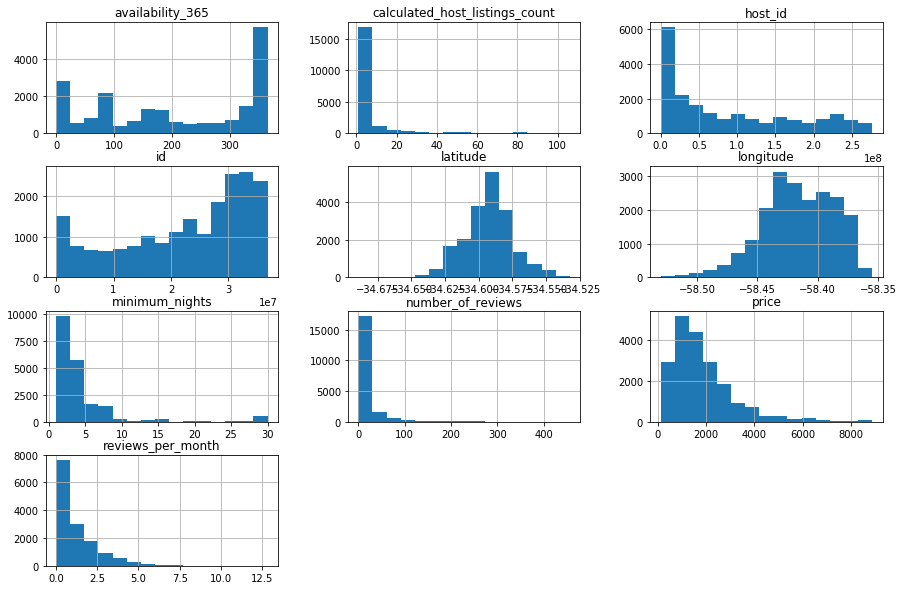

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 8900].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,19960.000000,19960.000000,19960.000000,14435.000000,19960.000000,19960.000000
mean,1852.772345,4.026653,14.699549,1.248384,6.188226,204.588978
std,1350.044290,5.329420,29.964830,1.363393,14.471389,133.906757
min,126.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,963.000000,1.000000,0.000000,0.280000,1.000000,84.000000
50%,1508.000000,3.000000,3.000000,0.780000,1.000000,196.000000
75%,2303.000000,4.000000,15.000000,1.790000,4.000000,349.000000
max,8878.000000,30.000000,456.000000,12.820000,106.000000,365.000000


In [ ]:
# ver a média da coluna `price`
df_clean.loc[:,"price"].mean()


1852.7723446893788

A média após a limpeza dos outliers ficou em 1852

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.009801,0.011706,-0.059797,0.194299,0.122095
minimum_nights,-0.009801,1.000000,-0.120866,-0.216628,0.104792,0.022984
number_of_reviews,0.011706,-0.120866,1.000000,0.469796,-0.054311,0.055251
reviews_per_month,-0.059797,-0.216628,0.469796,1.000000,-0.112405,-0.057426
calculated_host_listings_count,0.194299,0.104792,-0.054311,-0.112405,1.000000,0.075983
availability_365,0.122095,0.022984,0.055251,-0.057426,0.075983,1.000000


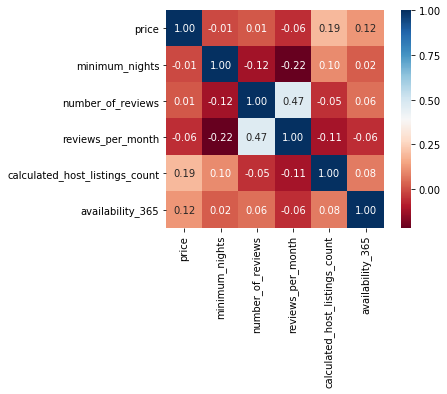

In [ ]:
# plotar um heatmap a partir das correlações
sbs.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.*italicized text*

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()


Entire home/apt    14934
Private room        4422
Shared room          604
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]


Entire home/apt    0.748196
Private room       0.221543
Shared room        0.030261
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média dos 10 primeiras
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]


neighbourhood
Puerto Madero    4384.969697
Villa Soldati    2882.333333
Palermo          2181.195393
Recoleta         2131.322884
Retiro           2083.850150
Nueva Pompeya    1907.083333
Villa Devoto     1838.500000
San Telmo        1799.605304
Nuñez            1783.647368
Villa Real       1757.428571
Name: price, dtype: float64

In [ ]:
# o bairro com o menor valor
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[-1:]

neighbourhood
Villa Lugano    698.9
Name: price, dtype: float64

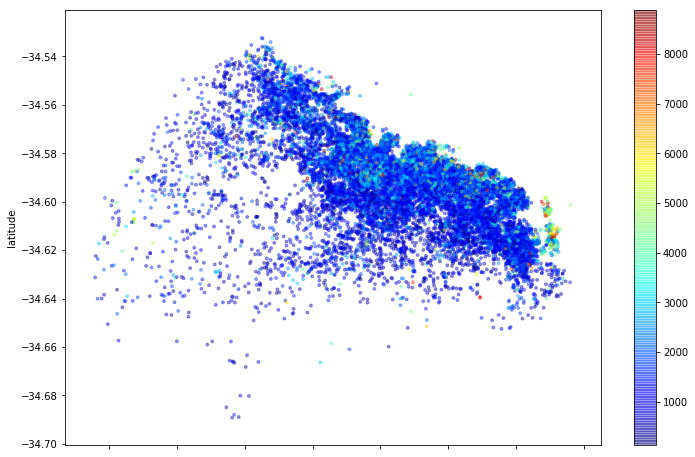

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``

df_clean.loc[:,"minimum_nights"].mean()

4.026653306613227

## Conclusões


Pesquisa superficial
* Alguns outliers.
* Bairro mais caro é Puerto Madero, o mais barato Villa Lugano.
* A média de noites alugadas é de 4.
* O valor do aluguel médio é 1852
* Imóveis concentrados em uma região da cidade